## 8/23/18
### B180807
- Nb/Niw30s/Cu50/Nb JJ.
- Bias: 508 Ohm resistor, 94 Hz sweep.
- Input: gain 100x100, new scope keysight 10-bit resolution, average 32.

## Process new datafiles

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded existing db: results.txt
N of datafiles: 1
Datafile: data/005_BIV_B180807_chip33_A07_4000OeP.zip


c:\data\burm\code\cryomem-0.2.0\cryomem\common\metadata.py:44: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel_yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  rawconfig = yaml.load(src)


Default updateguess = 0.8
Quick guess: [0.0048326365, -0.0048326365, 0.0067880118004648, -4.878851236363638e-06]


c:\data\burm\code\cryomem-0.2.0\cryomem\common\plothyst.py:89: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle(None)        # windows bug?


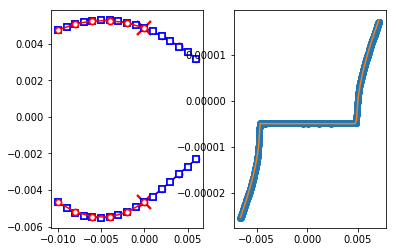

Your choice (c: continue, d: discard, r: refit, q: quit)? c


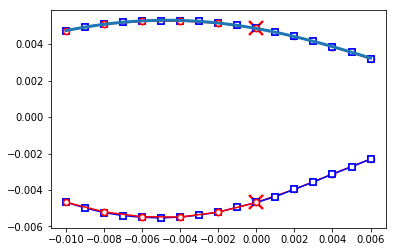

Your choice (c: continue, d: discard, r: refit, q: quit)? c
Done.


In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport nb_cmds, mylib

import glob

datafiles = glob.glob("data/*.zip")
ignore    = glob.glob("data/RSJ_*")
nb_cmds.process_new_datafiles(datafiles, ignore)

## Show all Ic(B)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded existing db: results.txt


c:\data\burm\code\cryomem-0.2.0\cryomem\common\metadata.py:44: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel_yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  rawconfig = yaml.load(src)
c:\data\burm\code\cryomem-0.2.0\cryomem\common\plothyst.py:89: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle(None)        # windows bug?


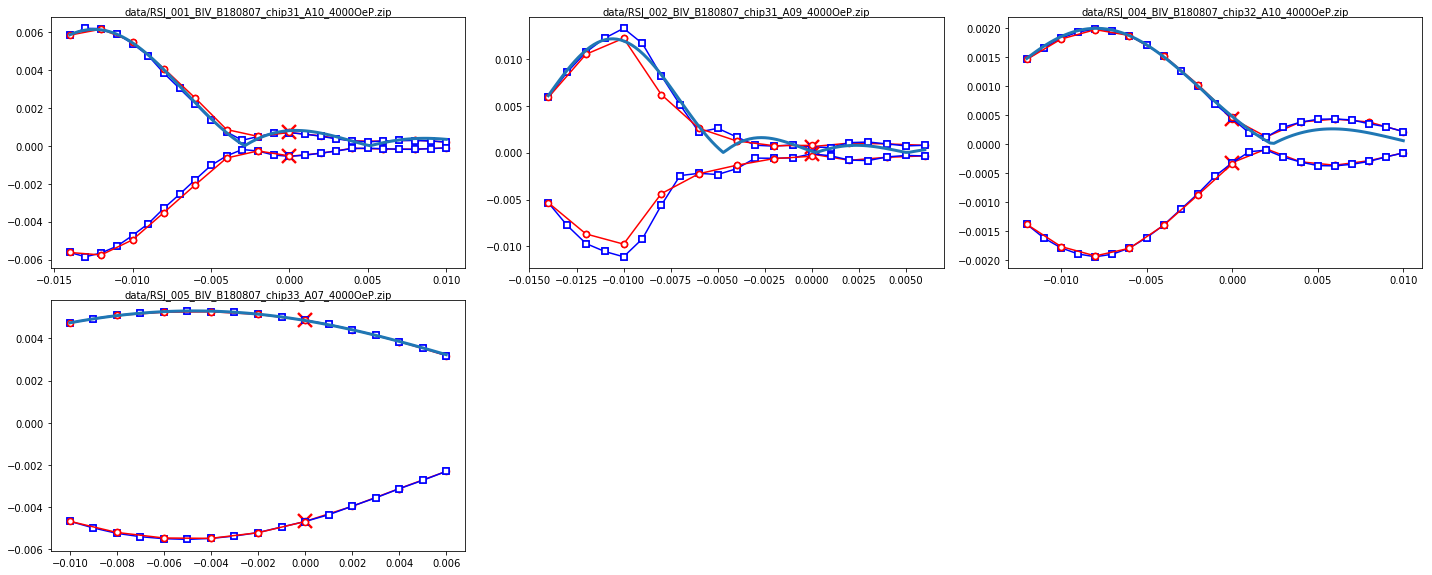

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport nb_cmds, mylib

nb_cmds.show_BIc()

## Thickness dependence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded existing db: results.txt


C:\Users\687spin\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


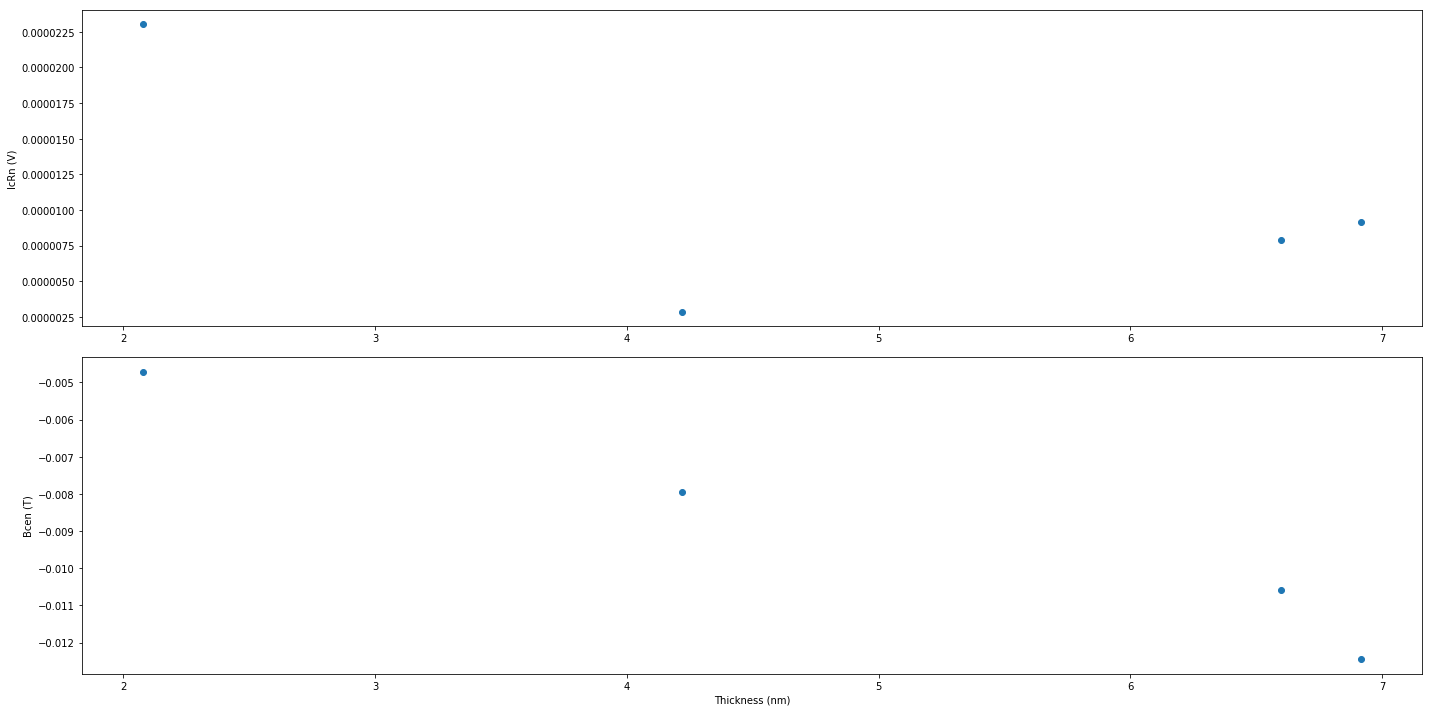

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport nb_cmds, mylib

devspecs = [{"wafer":"B180807", "cols": ["3"], 'xoffset': 0, 'duration': 30, 'calfile': "wedge_Ni_B180329.dat",
            'reticle': 'SF1', 'angle': 0}]
nb_cmds.show_thickness_dependence(dbs=['results.txt'], devspecs=devspecs)

## Thickness dependence, collection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Datafile: result_thickness.txt
Loaded existing db: result_thickness.txt
Datafile: ../20180813_steep wedge Ni JJ/result_thickness.txt
Loaded existing db: ../20180813_steep wedge Ni JJ/result_thickness.txt


/home/burm1/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


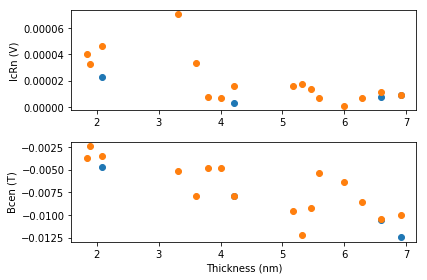

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport nb_cmds, mylib

nb_cmds.plot_thk_dep(['result_thickness.txt','../20180813_steep wedge Ni JJ/result_thickness.txt'])

In [3]:
# fitted thickness distribution
import cryomem.fab.wedge as wedge

w = wedge.Wedge()
for chip in ["36", "35", "34", "33", "32", "31", "41"]:
    kwargs = {'calfile': 'wedge_Ni_B180329.dat', 'reticle': 'SF1', 'chip': chip, 'device': "A10", 'angle': 0,
                 "duration": 60}
    d = w.get_thickness(**kwargs)
    print("Chip {}: {:.2f} nm".format(chip, d))

Chip 36: 1.10 nm
Chip 35: 1.69 nm
Chip 34: 2.81 nm
Chip 33: 4.92 nm
Chip 32: 8.44 nm
Chip 31: 13.83 nm
Chip 41: 17.20 nm


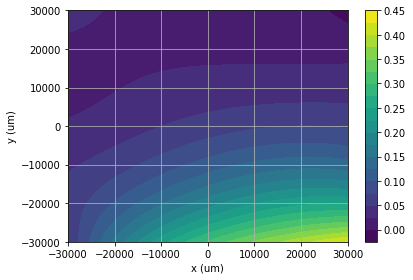

0

In [2]:
# plot wedge rate calibration
#%matplotlib notebook
import cryomem.fab.wedge as wedge
import matplotlib.pyplot as plt
w = wedge.Wedge()
w.plot(calfile='wedge_Ni_B180329.dat', ncontour=20)
#plt.savefig("wedge.png")